In [100]:
import pandas as pd
from glob import glob
import shutil
import matplotlib.pyplot as plt
import os
import numpy as np

from scipy.signal import butter, lfilter, freqz

In [17]:
pre_file_list=glob('../../data/row_collection/**/*gil.csv')
pre_move_file_list=[f.replace('/row_collection', '/pre_collection') for f in pre_file_list]
for i in range(len(pre_move_file_list)):
    shutil.move(pre_file_list[i],pre_move_file_list[i])

In [101]:

def standardize(signal):
    mean_val = sum(signal) / len(signal)
    std_dev = (sum((x - mean_val) ** 2 for x in signal) / len(signal)) ** 0.5
    standardized_signal = [(x - mean_val) / std_dev for x in signal]
    return standardized_signal

def min_max_normalize(signal):
    min_val = min(signal)
    max_val = max(signal)
    normalized_signal = [(x - min_val) / (max_val - min_val) for x in signal]
    return normalized_signal
def moving_average(data, window_size):
    """
    이동평균 필터를 적용하는 함수

    Parameters:
    - data: 입력 데이터 배열
    - window_size: 이동평균 창 크기

    Returns:
    - filtered_data: 이동평균이 적용된 데이터 배열
    """
    cumsum = np.cumsum(np.insert(data, 0, 0))
    moving_avg = (cumsum[window_size:] - cumsum[:-window_size]) / float(window_size)
    return moving_avg
def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def plot_frequency_response(lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(10, 6))
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.plot(lowcut, 0.5 * np.sqrt(2), 'ko')
    plt.plot(highcut, 0.5 * np.sqrt(2), 'ko')
    plt.axvline(lowcut, color='k')
    plt.axvline(highcut, color='k')
    plt.xlim(0, 0.5 * fs)
    plt.title("Butterworth Bandpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

In [21]:

pre_file_list=glob('../../data/pre_collection/**/*gil.csv')
test_file_list=[f.replace('/pre_collection', '/seg_collection') for f in pre_file_list]
for i in range(len(pre_file_list)):
    ppg_count=0
    filename=os.path.splitext(os.path.basename(pre_file_list[i]))[0]
    df=pd.read_csv(pre_file_list[i])
    ppg=df['GREEN']
    if len(ppg)>3000:
        ppg_count=len(ppg)//3000
    for j in range(ppg_count):
        temp_ppg=ppg[j*3000:j*3000+3000].tolist()
        temp_df=pd.DataFrame(temp_ppg,columns=['PPG'])
        temp_df.to_csv(os.path.dirname(test_file_list[i])+'/'+filename+'_'+str(j).zfill(4)+'.csv',index=False)

In [130]:
pre_file_list=glob('../../data/AF/Waveform_30/**/Type_All/**/*.csv')
test_file_list=[f.replace('/Type_All', '/Type_normalization') for f in pre_file_list]
for i in range(len(pre_file_list)):
    filename=os.path.splitext(os.path.basename(pre_file_list[i]))[0]
    df=pd.read_csv(pre_file_list[i])
    original_data=np.array(df['PPG'])
    filtered_data=np.array(min_max_normalize(original_data))
    df['PPG']=filtered_data
    df.to_csv(test_file_list[i],index=False)
    

In [129]:
pre_file_list=glob('../../data/seg_collection/**/*.csv')
test_file_list=[f.replace('/seg_collection', '/nor_collection') for f in pre_file_list]
for i in range(len(pre_file_list)):
    filename=os.path.splitext(os.path.basename(pre_file_list[i]))[0]
    df=pd.read_csv(pre_file_list[i])
    original_data=np.array(df['PPG'])
    filtered_data=np.array(min_max_normalize(original_data))
    df['PPG']=filtered_data
    df.to_csv(test_file_list[i],index=False)

In [120]:
df['PPG']=filtered_data


,PPG Class,PPG
0,0,0.601699
1,0,0.601637
2,0,0.601542
3,0,0.601388
4,0,0.601049
...,...,...
2995,0,0.993199
2996,0,0.984421
2997,0,0.972040
2998,0,0.955492


In [71]:
plt.plot()
plt.plot(filtered_data, label='Original Data')
plt.plot(filtered_data, label=f'Moving Average', linestyle='--', color='orange')
plt.legend()

plt.show()

(3000,)

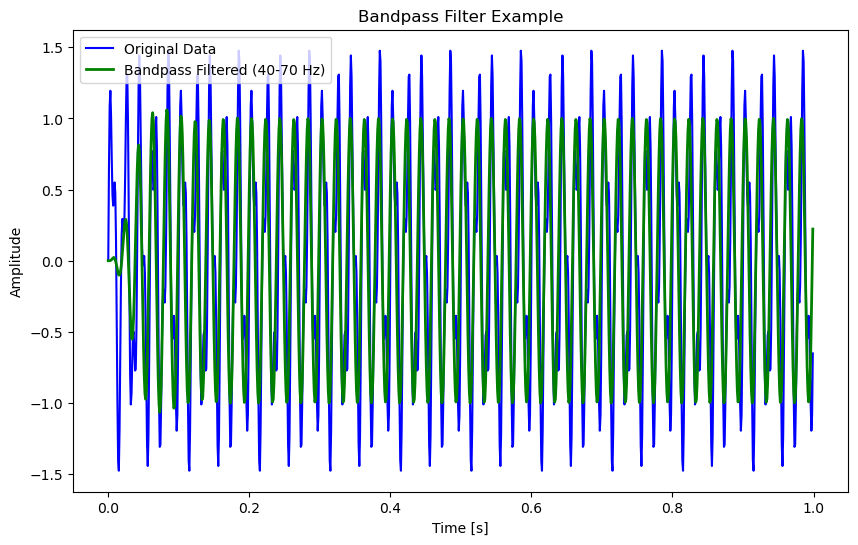

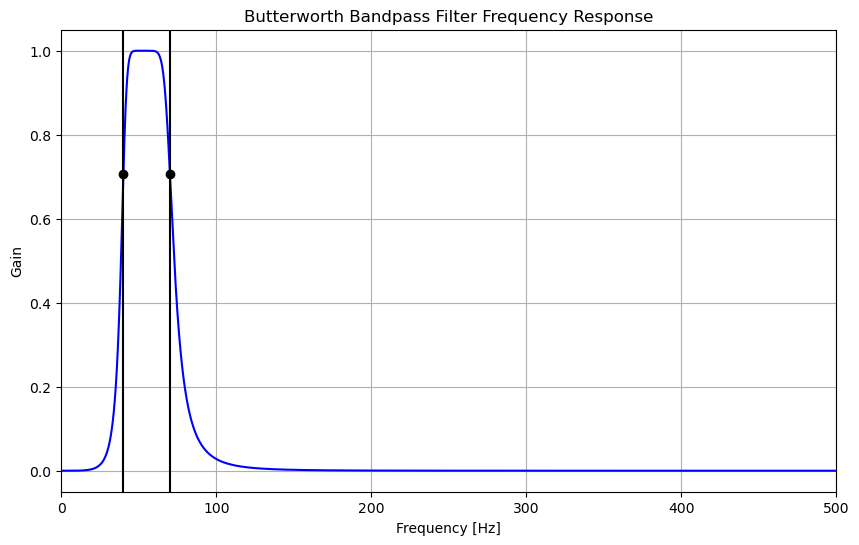

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

def butter_bandpass(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def plot_frequency_response(lowcut, highcut, fs, order=4):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    w, h = freqz(b, a, worN=8000)
    plt.figure(figsize=(10, 6))
    plt.plot(0.5 * fs * w / np.pi, np.abs(h), 'b')
    plt.plot(lowcut, 0.5 * np.sqrt(2), 'ko')
    plt.plot(highcut, 0.5 * np.sqrt(2), 'ko')
    plt.axvline(lowcut, color='k')
    plt.axvline(highcut, color='k')
    plt.xlim(0, 0.5 * fs)
    plt.title("Butterworth Bandpass Filter Frequency Response")
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Gain')
    plt.grid()
    plt.show()

# 시뮬레이션용 데이터 생성
fs = 1000  # 샘플링 주파수
t = np.arange(0, 1, 1/fs)  # 1초 동안의 시간 배열
data = np.sin(2 * np.pi * 50 * t) + 0.5 * np.sin(2 * np.pi * 120 * t)  # 50Hz와 120Hz의 신호를 합친 데이터

# 대역통과 필터 적용
lowcut = 40  # 저역 주파수
highcut = 70  # 고역 주파수
filtered_data = butter_bandpass_filter(data, lowcut, highcut, fs, order=4)

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.plot(t, data, 'b-', label='Original Data')
plt.plot(t, filtered_data, 'g-', linewidth=2, label=f'Bandpass Filtered ({lowcut}-{highcut} Hz)')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Bandpass Filter Example')
plt.show()

# 주파수 응답 시각화
plot_frequency_response(lowcut, highcut, fs, order=4)